In [47]:
#import refinitiv.data as rd
import configparser as cp
import eikon as ek  # the Eikon Python wrapper package
import pandas as pd
import numpy as np
import cufflinks as cf  # Cufflinks
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#plt.style.use('seaborn-dark-palette')
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from dateutil.relativedelta import relativedelta
import talib as ta

In [48]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [66]:
start_date = '2020-01-01'  # Specify the start date
end_date = '2024-04-04'    # Specify the end date

df = ek.get_timeseries(
    'NOVOb.CO',                # Ticker symbol for Microsoft
    start_date=start_date,
    end_date=end_date,
    interval='daily'       # Fetch monthly prices
)

In [67]:
df

NOVOb.CO,HIGH,CLOSE,LOW,OPEN,VOLUME
Date,,,,,
2020-01-02,196.7,194.35,192.975,193.0,3931070
2020-01-03,195.45,191.6,190.775,194.75,4269382
2020-01-06,192.45,191.025,190.025,191.2,3423256
2020-01-07,192.875,190.85,189.7,191.75,3473898
2020-01-08,192.35,191.25,190.475,190.95,2592602
...,...,...,...,...,...
2024-03-26,894.6,888.3,879.0,890.4,2930730
2024-03-27,896.3,881.3,877.6,895.0,2544307
2024-04-02,898.0,867.1,859.4,897.3,3727558


In [68]:
function_groups = ['Overlap Studies',
                   'Momentum Indicators',
                   'Volume Indicators',
                   'Volatility Indicators',
                   'Price Transform',
                   'Cycle Indicators',
                   'Pattern Recognition',
                   'Statistic Functions',
                   'Math Transform',
                   'Math Operators']

In [69]:
talib_grps = ta.get_function_groups()

In [70]:
talib_grps

{'Cycle Indicators': ['HT_DCPERIOD',
  'HT_DCPHASE',
  'HT_PHASOR',
  'HT_SINE',
  'HT_TRENDMODE'],
 'Math Operators': ['ADD',
  'DIV',
  'MAX',
  'MAXINDEX',
  'MIN',
  'MININDEX',
  'MINMAX',
  'MINMAXINDEX',
  'MULT',
  'SUB',
  'SUM'],
 'Math Transform': ['ACOS',
  'ASIN',
  'ATAN',
  'CEIL',
  'COS',
  'COSH',
  'EXP',
  'FLOOR',
  'LN',
  'LOG10',
  'SIN',
  'SINH',
  'SQRT',
  'TAN',
  'TANH'],
 'Momentum Indicators': ['ADX',
  'ADXR',
  'APO',
  'AROON',
  'AROONOSC',
  'BOP',
  'CCI',
  'CMO',
  'DX',
  'MACD',
  'MACDEXT',
  'MACDFIX',
  'MFI',
  'MINUS_DI',
  'MINUS_DM',
  'MOM',
  'PLUS_DI',
  'PLUS_DM',
  'PPO',
  'ROC',
  'ROCP',
  'ROCR',
  'ROCR100',
  'RSI',
  'STOCH',
  'STOCHF',
  'STOCHRSI',
  'TRIX',
  'ULTOSC',
  'WILLR'],
 'Overlap Studies': ['BBANDS',
  'DEMA',
  'EMA',
  'HT_TRENDLINE',
  'KAMA',
  'MA',
  'MAMA',
  'MAVP',
  'MIDPOINT',
  'MIDPRICE',
  'SAR',
  'SAREXT',
  'SMA',
  'T3',
  'TEMA',
  'TRIMA',
  'WMA'],
 'Pattern Recognition': ['CDL2CROWS',
  'C

In [71]:
df['20_SMA'] = df['CLOSE'].rolling(window = 20, min_periods = 1).mean()
df

NOVOb.CO,HIGH,CLOSE,LOW,OPEN,VOLUME,20_SMA
Date,,,,,,
2020-01-02,196.7,194.35,192.975,193.0,3931070,194.35000
2020-01-03,195.45,191.6,190.775,194.75,4269382,192.97500
2020-01-06,192.45,191.025,190.025,191.2,3423256,192.32500
2020-01-07,192.875,190.85,189.7,191.75,3473898,191.95625
2020-01-08,192.35,191.25,190.475,190.95,2592602,191.81500
...,...,...,...,...,...,...
2024-03-26,894.6,888.3,879.0,890.4,2930730,886.58000
2024-03-27,896.3,881.3,877.6,895.0,2544307,888.94000
2024-04-02,898.0,867.1,859.4,897.3,3727558,891.31000


In [72]:
df['50_SMA'] = df['CLOSE'].rolling(window = 50, min_periods = 1).mean()
df

NOVOb.CO,HIGH,CLOSE,LOW,OPEN,VOLUME,20_SMA,50_SMA
Date,,,,,,,
2020-01-02,196.7,194.35,192.975,193.0,3931070,194.35000,194.35000
2020-01-03,195.45,191.6,190.775,194.75,4269382,192.97500,192.97500
2020-01-06,192.45,191.025,190.025,191.2,3423256,192.32500,192.32500
2020-01-07,192.875,190.85,189.7,191.75,3473898,191.95625,191.95625
2020-01-08,192.35,191.25,190.475,190.95,2592602,191.81500,191.81500
...,...,...,...,...,...,...,...
2024-03-26,894.6,888.3,879.0,890.4,2930730,886.58000,832.13000
2024-03-27,896.3,881.3,877.6,895.0,2544307,888.94000,835.10800
2024-04-02,898.0,867.1,859.4,897.3,3727558,891.31000,837.80400


In [73]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['20_SMA'] > df['50_SMA'], 1.0, 0.0)
df['Position_alt'] = np.where(df['20_SMA'] > df['50_SMA'], 1.0, -1.0)
df.head(10)

NOVOb.CO,HIGH,CLOSE,LOW,OPEN,VOLUME,20_SMA,50_SMA,Signal,Position_alt
Date,,,,,,,,,
2020-01-02,196.7,194.35,192.975,193.0,3931070,194.350000,194.350000,0.0,-1.0
2020-01-03,195.45,191.6,190.775,194.75,4269382,192.975000,192.975000,0.0,-1.0
2020-01-06,192.45,191.025,190.025,191.2,3423256,192.325000,192.325000,0.0,-1.0
2020-01-07,192.875,190.85,189.7,191.75,3473898,191.956250,191.956250,0.0,-1.0
2020-01-08,192.35,191.25,190.475,190.95,2592602,191.815000,191.815000,0.0,-1.0
2020-01-09,194.125,193.95,192.35,192.75,2999206,192.170833,192.170833,0.0,-1.0
2020-01-10,198.65,198.65,193.925,194.25,5761810,193.096429,193.096429,0.0,-1.0
2020-01-13,199.65,198.525,197.25,198.1,3194998,193.775000,193.775000,0.0,-1.0
2020-01-14,199.3,199.3,196.925,198.75,3924686,194.388889,194.388889,0.0,-1.0


In [74]:
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()

NOVOb.CO,HIGH,CLOSE,LOW,OPEN,VOLUME,20_SMA,50_SMA,Signal,Position_alt,Position
Date,,,,,,,,,,
2020-01-02,196.7,194.35,192.975,193.0,3931070,194.35000,194.35000,0.0,-1.0,NaN
2020-01-03,195.45,191.6,190.775,194.75,4269382,192.97500,192.97500,0.0,-1.0,0.0
2020-01-06,192.45,191.025,190.025,191.2,3423256,192.32500,192.32500,0.0,-1.0,0.0
2020-01-07,192.875,190.85,189.7,191.75,3473898,191.95625,191.95625,0.0,-1.0,0.0
2020-01-08,192.35,191.25,190.475,190.95,2592602,191.81500,191.81500,0.0,-1.0,0.0


In [80]:
df

NOVOb.CO,HIGH,CLOSE,LOW,OPEN,VOLUME,20_SMA,50_SMA,Signal,Position_alt,Position,returns,strategy
Date,,,,,,,,,,,,
2020-01-03,195.45,191.6,190.775,194.75,4269382,192.975000,192.975000,0.0,-1.0,0.0,<NA>,<NA>
2020-01-06,192.45,191.025,190.025,191.2,3423256,192.325000,192.325000,0.0,-1.0,0.0,-0.003006,0.003006
2020-01-07,192.875,190.85,189.7,191.75,3473898,191.956250,191.956250,0.0,-1.0,0.0,-0.000917,0.000917
2020-01-08,192.35,191.25,190.475,190.95,2592602,191.815000,191.815000,0.0,-1.0,0.0,0.002094,-0.002094
2020-01-09,194.125,193.95,192.35,192.75,2999206,192.170833,192.170833,0.0,-1.0,0.0,0.014019,-0.014019
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-26,894.6,888.3,879.0,890.4,2930730,886.580000,832.130000,1.0,1.0,0.0,-0.006955,-0.006955
2024-03-27,896.3,881.3,877.6,895.0,2544307,888.940000,835.108000,1.0,1.0,0.0,-0.007911,-0.007911
2024-04-02,898.0,867.1,859.4,897.3,3727558,891.310000,837.804000,1.0,1.0,0.0,-0.016244,-0.016244


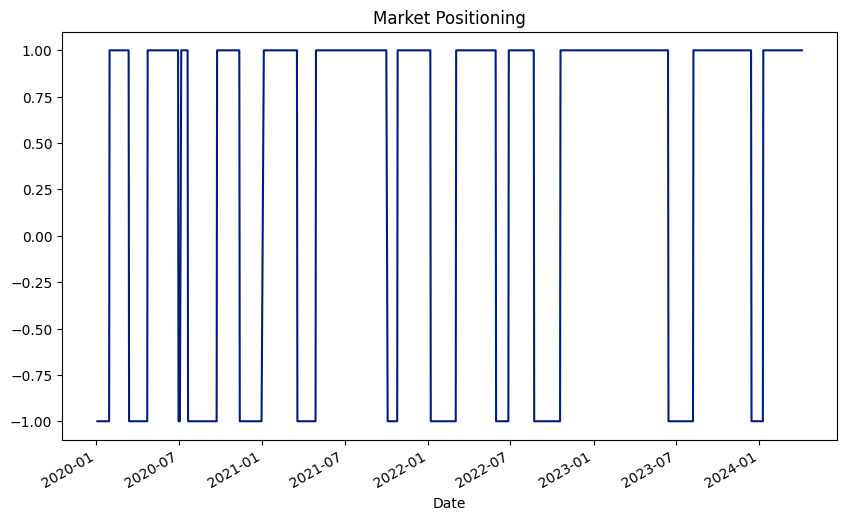

In [75]:
df.dropna(inplace=True)
df['Position_alt'].plot(ylim=[-1.1, 1.1],
                               title='Market Positioning',
                               figsize=(10, 6));

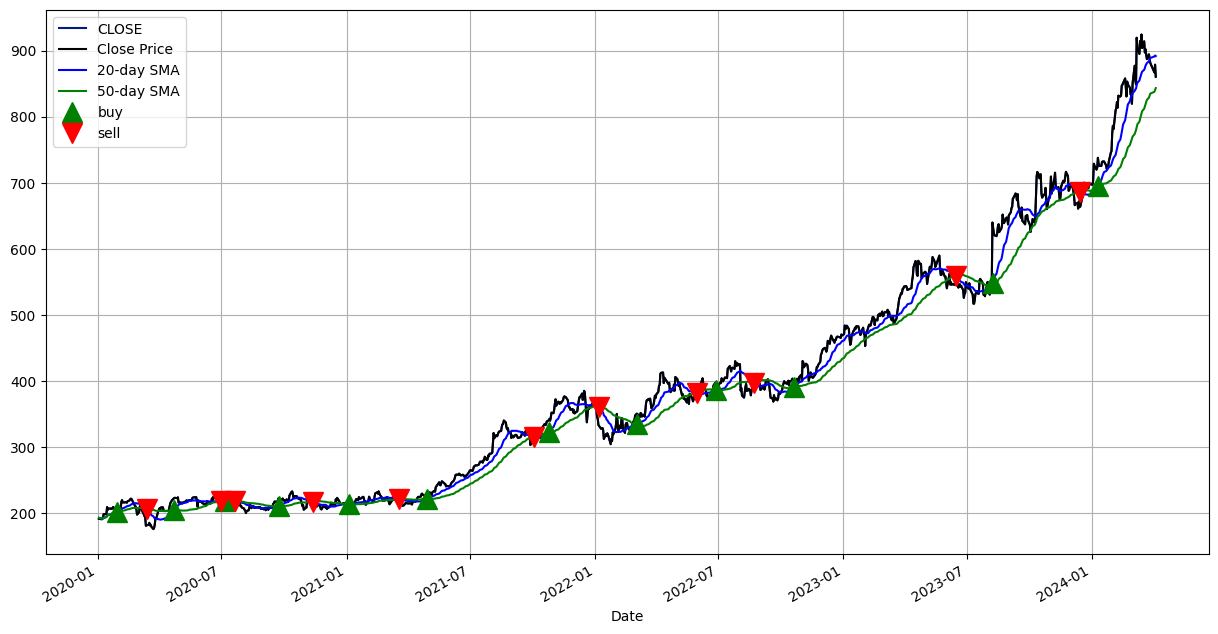

In [76]:
plt = df['CLOSE'].plot(figsize = (15, 8))

# plot close price, short-term and long-term moving averages 
df['CLOSE'].plot(color = 'k', label= 'Close Price') 
df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
df['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, 
         df['20_SMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, 
         df['20_SMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
#plt.ylabel('Price', fontsize = 15 )
#plt.xlabel('Date', fontsize = 15 )
#plt.title('APPL', fontsize = 20)
plt.legend()
plt.grid()
#plt.show()

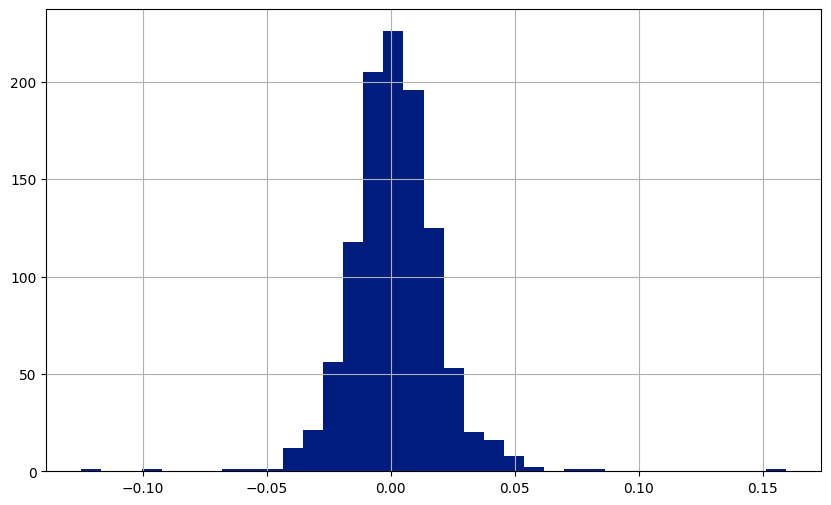

In [77]:
df['returns'] = np.log(df['CLOSE'] / df['CLOSE'].shift(1))
df['returns'].hist(bins=35, figsize=(10, 6));

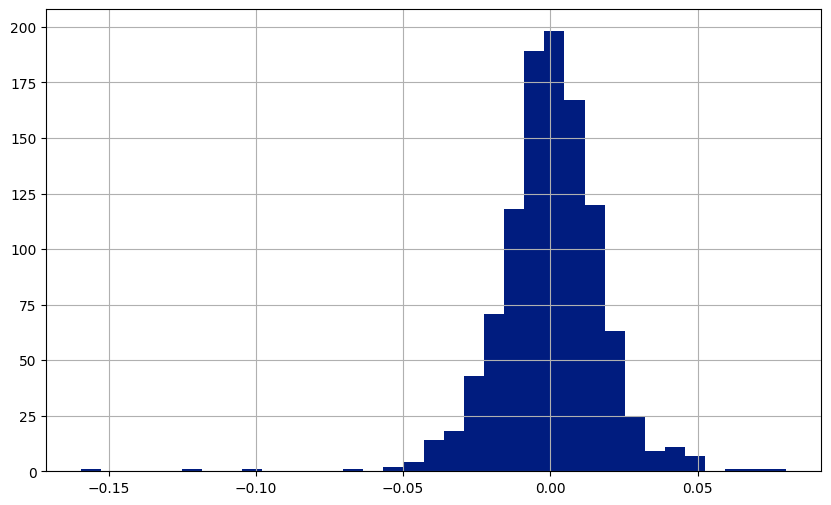

In [78]:
df['strategy'] = df['Position_alt'].shift(1) * df['returns']
df['strategy'].hist(bins=35, figsize=(10, 6));

In [79]:
df[['returns', 'strategy']]. sum()
df[['returns', 'strategy']].sum().apply(np.exp)

NOVOb.CO
returns     4.491649
strategy    1.041223
dtype: float64